# Comparison of the frequency of queries and the frequency of disasters

In [56]:
# imports
import pandas as pd
import pyexasol

pd.set_option("display.max_colwidth", None)
def print_query(query, connection):
    stmt = connection.export_to_pandas(query)
    print(stmt.head())
    return stmt

host = '192.168.56.101/3D518979E1BE8B4E0A23B7A296E6AD35D5EC29DCCE01E5CC6ECBA7C9E38D8E96:8563'  # Don't forget to change the fingerprint
user = 'sys'
password = 'exasol'

# Connect to Exasol
conn = pyexasol.connect(dsn=host, 
                        user=user, 
                        password=password, 
                        debug=False, 
                        protocol_version=pyexasol.PROTOCOL_V1)

#### Extract the click counts and date times

In [131]:
q = ''' 
WITH TopURLs AS (
    SELECT URLDIM.URL
    FROM AOL_SCHEMA.FACTS 
    JOIN AOL_SCHEMA.URLDIM ON AOL_SCHEMA.FACTS.URLID = AOL_SCHEMA.URLDIM.ID
    WHERE AOL_SCHEMA.FACTS.CLICK = 1
    GROUP BY URLDIM.URL
    ORDER BY COUNT(AOL_SCHEMA.FACTS.CLICK) DESC
    LIMIT 20
),
FREQCOMP AS (
    SELECT 
        FACTS.ANONID,
        QUERYDIM.QUERY,
        CAST(
            CONCAT(
                '2006-',
                LPAD(CASE 
                    WHEN TIMEDIM."day of the year" BETWEEN 60 AND 90 THEN '03'
                    WHEN TIMEDIM."day of the year" BETWEEN 91 AND 120 THEN '04'
                    WHEN TIMEDIM."day of the year" BETWEEN 121 AND 151 THEN '05'
                    ELSE '01'
                END, 2, '0'), '-', 
                LPAD(TIMEDIM."day of the month", 2, '0'), ' ',
                LPAD(TIMEDIM."hour", 2, '0'), ':', 
                LPAD(TIMEDIM."minute", 2, '0'), ':', 
                LPAD(TIMEDIM."second", 2, '0')
            ) AS TIMESTAMP
        ) AS time_as_datetime
    FROM
        AOL_SCHEMA.FACTS 
        LEFT JOIN AOL_SCHEMA.TIMEDIM ON FACTS.TIMEID = TIMEDIM.ID
        LEFT JOIN AOL_SCHEMA.URLDIM ON FACTS.URLID = URLDIM.ID
        LEFT JOIN AOL_SCHEMA.QUERYDIM ON FACTS.QUERYID = QUERYDIM.ID
    WHERE FACTS.CLICK = 1
        AND (
            URLDIM.URL IN (SELECT URL FROM TopURLs)
            OR LOWER(URLDIM.URL) LIKE '%weather%'
        )
        AND FACTS.ANONID IS NOT NULL
        AND TIMEDIM."hour" IS NOT NULL
        AND TIMEDIM."minute" IS NOT NULL
        AND TIMEDIM."second" IS NOT NULL
        AND TIMEDIM."day of the year" IS NOT NULL
),
DateRange AS (
    SELECT DATE '2006-03-01' AS EVENT_DATE
    UNION ALL SELECT DATE '2006-03-02'
    UNION ALL SELECT DATE '2006-03-03'
    UNION ALL SELECT DATE '2006-03-04'
    UNION ALL SELECT DATE '2006-03-05'
    UNION ALL SELECT DATE '2006-03-06'
    UNION ALL SELECT DATE '2006-03-07'
    UNION ALL SELECT DATE '2006-03-08'
    UNION ALL SELECT DATE '2006-03-09'
    UNION ALL SELECT DATE '2006-03-10'
    UNION ALL SELECT DATE '2006-03-11'
    UNION ALL SELECT DATE '2006-03-12'
    UNION ALL SELECT DATE '2006-03-13'
    UNION ALL SELECT DATE '2006-03-14'
    UNION ALL SELECT DATE '2006-03-15'
    UNION ALL SELECT DATE '2006-03-16'
    UNION ALL SELECT DATE '2006-03-17'
    UNION ALL SELECT DATE '2006-03-18'
    UNION ALL SELECT DATE '2006-03-19'
    UNION ALL SELECT DATE '2006-03-20'
    UNION ALL SELECT DATE '2006-03-21'
    UNION ALL SELECT DATE '2006-03-22'
    UNION ALL SELECT DATE '2006-03-23'
    UNION ALL SELECT DATE '2006-03-24'
    UNION ALL SELECT DATE '2006-03-25'
    UNION ALL SELECT DATE '2006-03-26'
    UNION ALL SELECT DATE '2006-03-27'
    UNION ALL SELECT DATE '2006-03-28'
    UNION ALL SELECT DATE '2006-03-29'
    UNION ALL SELECT DATE '2006-03-30'
    UNION ALL SELECT DATE '2006-03-31'
    UNION ALL SELECT DATE '2006-04-01'
    UNION ALL SELECT DATE '2006-04-02'
    UNION ALL SELECT DATE '2006-04-03'
    UNION ALL SELECT DATE '2006-04-04'
    UNION ALL SELECT DATE '2006-04-05'
    UNION ALL SELECT DATE '2006-04-06'
    UNION ALL SELECT DATE '2006-04-07'
    UNION ALL SELECT DATE '2006-04-08'
    UNION ALL SELECT DATE '2006-04-09'
    UNION ALL SELECT DATE '2006-04-10'
    UNION ALL SELECT DATE '2006-04-11'
    UNION ALL SELECT DATE '2006-04-12'
    UNION ALL SELECT DATE '2006-04-13'
    UNION ALL SELECT DATE '2006-04-14'
    UNION ALL SELECT DATE '2006-04-15'
    UNION ALL SELECT DATE '2006-04-16'
    UNION ALL SELECT DATE '2006-04-17'
    UNION ALL SELECT DATE '2006-04-18'
    UNION ALL SELECT DATE '2006-04-19'
    UNION ALL SELECT DATE '2006-04-20'
    UNION ALL SELECT DATE '2006-04-21'
    UNION ALL SELECT DATE '2006-04-22'
    UNION ALL SELECT DATE '2006-04-23'
    UNION ALL SELECT DATE '2006-04-24'
    UNION ALL SELECT DATE '2006-04-25'
    UNION ALL SELECT DATE '2006-04-26'
    UNION ALL SELECT DATE '2006-04-27'
    UNION ALL SELECT DATE '2006-04-28'
    UNION ALL SELECT DATE '2006-04-29'
    UNION ALL SELECT DATE '2006-04-30'
    UNION ALL SELECT DATE '2006-05-01'
    UNION ALL SELECT DATE '2006-05-02'
    UNION ALL SELECT DATE '2006-05-03'
    UNION ALL SELECT DATE '2006-05-04'
    UNION ALL SELECT DATE '2006-05-05'
    UNION ALL SELECT DATE '2006-05-06'
    UNION ALL SELECT DATE '2006-05-07'
    UNION ALL SELECT DATE '2006-05-08'
    UNION ALL SELECT DATE '2006-05-09'
    UNION ALL SELECT DATE '2006-05-10'
    UNION ALL SELECT DATE '2006-05-11'
    UNION ALL SELECT DATE '2006-05-12'
    UNION ALL SELECT DATE '2006-05-13'
    UNION ALL SELECT DATE '2006-05-14'
    UNION ALL SELECT DATE '2006-05-15'
    UNION ALL SELECT DATE '2006-05-16'
    UNION ALL SELECT DATE '2006-05-17'
    UNION ALL SELECT DATE '2006-05-18'
    UNION ALL SELECT DATE '2006-05-19'
    UNION ALL SELECT DATE '2006-05-20'
    UNION ALL SELECT DATE '2006-05-21'
    UNION ALL SELECT DATE '2006-05-22'
    UNION ALL SELECT DATE '2006-05-23'
    UNION ALL SELECT DATE '2006-05-24'
    UNION ALL SELECT DATE '2006-05-25'
    UNION ALL SELECT DATE '2006-05-26'
    UNION ALL SELECT DATE '2006-05-27'
    UNION ALL SELECT DATE '2006-05-28'
    UNION ALL SELECT DATE '2006-05-29'
    UNION ALL SELECT DATE '2006-05-30'
    UNION ALL SELECT DATE '2006-05-31'
)
SELECT 
    DateRange.EVENT_DATE AS query_date,
    COALESCE(COUNT(*), 0) AS number_of_queries
FROM 
    DateRange
LEFT JOIN 
    FREQCOMP E
ON 
    CAST(E.time_as_datetime AS DATE) = DateRange.EVENT_DATE
AND LOWER(E.QUERY) LIKE '%tornado%'
GROUP BY 
    DateRange.EVENT_DATE
ORDER BY 
    query_date;
'''


queries_by_day_df = print_query(q, conn)
queries_by_day_df

   QUERY_DATE  NUMBER_OF_QUERIES
0  2006-03-01                  2
1  2006-03-02                  1
2  2006-03-03                  2
3  2006-03-04                  2
4  2006-03-05                  2


,QUERY_DATE,NUMBER_OF_QUERIES
0,2006-03-01,2
1,2006-03-02,1
2,2006-03-03,2
3,2006-03-04,2
4,2006-03-05,2
...,...,...
87,2006-05-27,1
88,2006-05-28,1
89,2006-05-29,3
90,2006-05-30,1


#### For each day, count the number of natural disasters occurring

In [130]:
q = '''
WITH DateRange AS (
    SELECT DATE '2006-03-01' AS EVENT_DATE
    UNION ALL SELECT DATE '2006-03-02'
    UNION ALL SELECT DATE '2006-03-03'
    UNION ALL SELECT DATE '2006-03-04'
    UNION ALL SELECT DATE '2006-03-05'
    UNION ALL SELECT DATE '2006-03-06'
    UNION ALL SELECT DATE '2006-03-07'
    UNION ALL SELECT DATE '2006-03-08'
    UNION ALL SELECT DATE '2006-03-09'
    UNION ALL SELECT DATE '2006-03-10'
    UNION ALL SELECT DATE '2006-03-11'
    UNION ALL SELECT DATE '2006-03-12'
    UNION ALL SELECT DATE '2006-03-13'
    UNION ALL SELECT DATE '2006-03-14'
    UNION ALL SELECT DATE '2006-03-15'
    UNION ALL SELECT DATE '2006-03-16'
    UNION ALL SELECT DATE '2006-03-17'
    UNION ALL SELECT DATE '2006-03-18'
    UNION ALL SELECT DATE '2006-03-19'
    UNION ALL SELECT DATE '2006-03-20'
    UNION ALL SELECT DATE '2006-03-21'
    UNION ALL SELECT DATE '2006-03-22'
    UNION ALL SELECT DATE '2006-03-23'
    UNION ALL SELECT DATE '2006-03-24'
    UNION ALL SELECT DATE '2006-03-25'
    UNION ALL SELECT DATE '2006-03-26'
    UNION ALL SELECT DATE '2006-03-27'
    UNION ALL SELECT DATE '2006-03-28'
    UNION ALL SELECT DATE '2006-03-29'
    UNION ALL SELECT DATE '2006-03-30'
    UNION ALL SELECT DATE '2006-03-31'
    UNION ALL SELECT DATE '2006-04-01'
    UNION ALL SELECT DATE '2006-04-02'
    UNION ALL SELECT DATE '2006-04-03'
    UNION ALL SELECT DATE '2006-04-04'
    UNION ALL SELECT DATE '2006-04-05'
    UNION ALL SELECT DATE '2006-04-06'
    UNION ALL SELECT DATE '2006-04-07'
    UNION ALL SELECT DATE '2006-04-08'
    UNION ALL SELECT DATE '2006-04-09'
    UNION ALL SELECT DATE '2006-04-10'
    UNION ALL SELECT DATE '2006-04-11'
    UNION ALL SELECT DATE '2006-04-12'
    UNION ALL SELECT DATE '2006-04-13'
    UNION ALL SELECT DATE '2006-04-14'
    UNION ALL SELECT DATE '2006-04-15'
    UNION ALL SELECT DATE '2006-04-16'
    UNION ALL SELECT DATE '2006-04-17'
    UNION ALL SELECT DATE '2006-04-18'
    UNION ALL SELECT DATE '2006-04-19'
    UNION ALL SELECT DATE '2006-04-20'
    UNION ALL SELECT DATE '2006-04-21'
    UNION ALL SELECT DATE '2006-04-22'
    UNION ALL SELECT DATE '2006-04-23'
    UNION ALL SELECT DATE '2006-04-24'
    UNION ALL SELECT DATE '2006-04-25'
    UNION ALL SELECT DATE '2006-04-26'
    UNION ALL SELECT DATE '2006-04-27'
    UNION ALL SELECT DATE '2006-04-28'
    UNION ALL SELECT DATE '2006-04-29'
    UNION ALL SELECT DATE '2006-04-30'
    UNION ALL SELECT DATE '2006-05-01'
    UNION ALL SELECT DATE '2006-05-02'
    UNION ALL SELECT DATE '2006-05-03'
    UNION ALL SELECT DATE '2006-05-04'
    UNION ALL SELECT DATE '2006-05-05'
    UNION ALL SELECT DATE '2006-05-06'
    UNION ALL SELECT DATE '2006-05-07'
    UNION ALL SELECT DATE '2006-05-08'
    UNION ALL SELECT DATE '2006-05-09'
    UNION ALL SELECT DATE '2006-05-10'
    UNION ALL SELECT DATE '2006-05-11'
    UNION ALL SELECT DATE '2006-05-12'
    UNION ALL SELECT DATE '2006-05-13'
    UNION ALL SELECT DATE '2006-05-14'
    UNION ALL SELECT DATE '2006-05-15'
    UNION ALL SELECT DATE '2006-05-16'
    UNION ALL SELECT DATE '2006-05-17'
    UNION ALL SELECT DATE '2006-05-18'
    UNION ALL SELECT DATE '2006-05-19'
    UNION ALL SELECT DATE '2006-05-20'
    UNION ALL SELECT DATE '2006-05-21'
    UNION ALL SELECT DATE '2006-05-22'
    UNION ALL SELECT DATE '2006-05-23'
    UNION ALL SELECT DATE '2006-05-24'
    UNION ALL SELECT DATE '2006-05-25'
    UNION ALL SELECT DATE '2006-05-26'
    UNION ALL SELECT DATE '2006-05-27'
    UNION ALL SELECT DATE '2006-05-28'
    UNION ALL SELECT DATE '2006-05-29'
    UNION ALL SELECT DATE '2006-05-30'
    UNION ALL SELECT DATE '2006-05-31'
)
SELECT 
    DateRange.EVENT_DATE,
    COALESCE(COUNT(E.EPISODE_ID), 0) AS EVENT_COUNT
FROM 
    DateRange
LEFT JOIN 
    AOL_SCHEMA.WEATHER_EVENTS E
ON 
    CAST(E.BEGIN_DATE_TIME AS DATE) = DateRange.EVENT_DATE
    AND E.EVENT_TYPE = 'Tornado'
GROUP BY 
    DateRange.EVENT_DATE
ORDER BY 
    DateRange.EVENT_DATE;
'''

events_by_day_df = print_query(q, conn)
events_by_day_df

   EVENT_DATE  EVENT_COUNT
0  2006-03-01            0
1  2006-03-02            0
2  2006-03-03            0
3  2006-03-04            0
4  2006-03-05            0


,EVENT_DATE,EVENT_COUNT
0,2006-03-01,0
1,2006-03-02,0
2,2006-03-03,0
3,2006-03-04,0
4,2006-03-05,0
...,...,...
87,2006-05-27,0
88,2006-05-28,0
89,2006-05-29,3
90,2006-05-30,2


#### Plot timeseries on the same plot

In [133]:
# Get proportions
queries_by_day_df['Props'] = queries_by_day_df['NUMBER_OF_QUERIES']/sum(queries_by_day_df['NUMBER_OF_QUERIES'])
events_by_day_df['Props'] = events_by_day_df['EVENT_COUNT']/sum(events_by_day_df['EVENT_COUNT'])

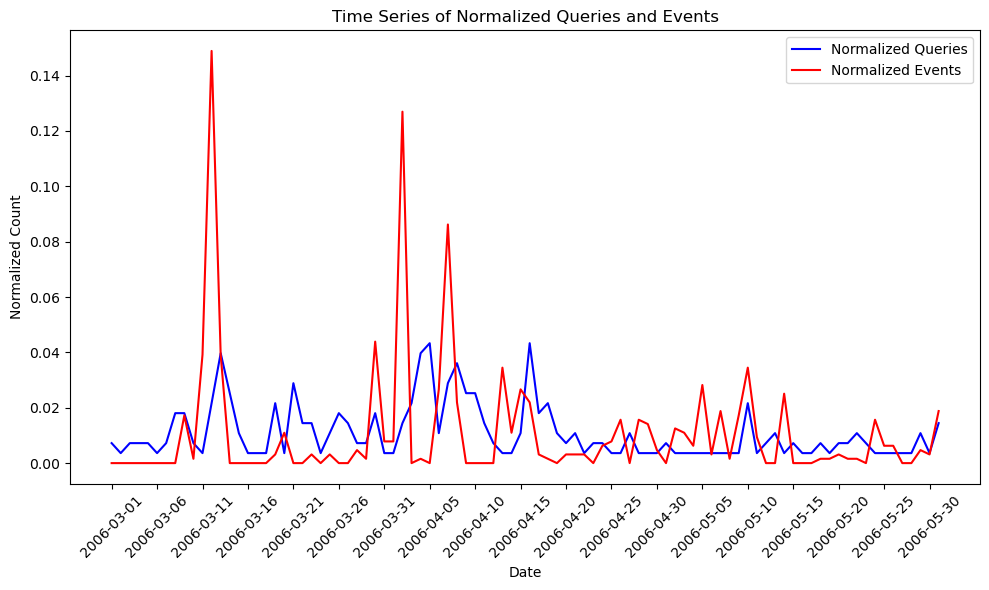

In [134]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(10, 6))

# Plot for the number of queries
plt.plot(queries_by_day_df['QUERY_DATE'], queries_by_day_df['Props'], label='Normalized Queries', color='blue')

# Plot for the number of events
plt.plot(events_by_day_df['EVENT_DATE'], events_by_day_df['Props'], label='Normalized Events', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Count')
plt.title('Time Series of Normalized Queries and Events')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Get every 5th tick label
tick_positions = plt.gca().get_xticks()  # Get all tick positions
tick_labels = plt.gca().get_xticklabels()  # Get all tick labels

# Show only every 5th tick
plt.xticks(tick_positions[::5], tick_labels[::5])  # Use slicing to pick every 5th position

# Display legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Do an in depth comparison of the time series

#### Correlation Comparison

We calculate the Pearson correlation coefficient between the two timeseries

In [112]:
queries_by_day_df['timestamp'] = queries_by_day_df['QUERY_DATE']
events_by_day_df['timestamp'] = events_by_day_df['EVENT_DATE']

merged_df = pd.merge(queries_by_day_df[['timestamp', 'NUMBER_OF_QUERIES']], events_by_day_df[['timestamp', 'EVENT_COUNT']], on='timestamp')

# Calculate the Pearson correlation between the two time series
correlation = merged_df['NUMBER_OF_QUERIES'].corr(merged_df['EVENT_COUNT'])

print(f'Pearson correlation between the two time series: {correlation}')

Pearson correlation between the two time series: 0.21443276592547392


#### Difference Plot

Plot the difference at each index

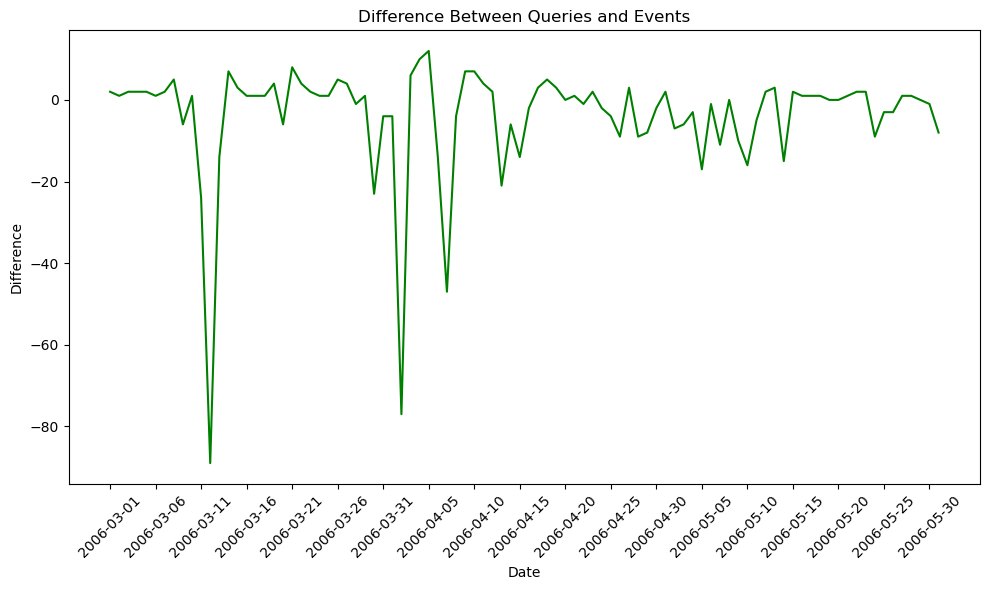

In [113]:
# Calculate the difference between the two time series
merged_df['difference'] = merged_df['NUMBER_OF_QUERIES'] - merged_df['EVENT_COUNT']

# Plot the difference over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df['timestamp'], merged_df['difference'], label='Difference', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference Between Queries and Events')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Get every 5th tick label
tick_positions = plt.gca().get_xticks()  # Get all tick positions
tick_labels = plt.gca().get_xticklabels()  # Get all tick labels

# Show only every 5th tick
plt.xticks(tick_positions[::5], tick_labels[::5])  # Use slicing to pick every 5th position


# Show plot
plt.tight_layout()
plt.show()

#### Rolling Mean Comparison

To smooth out the time series to identify longer term trends

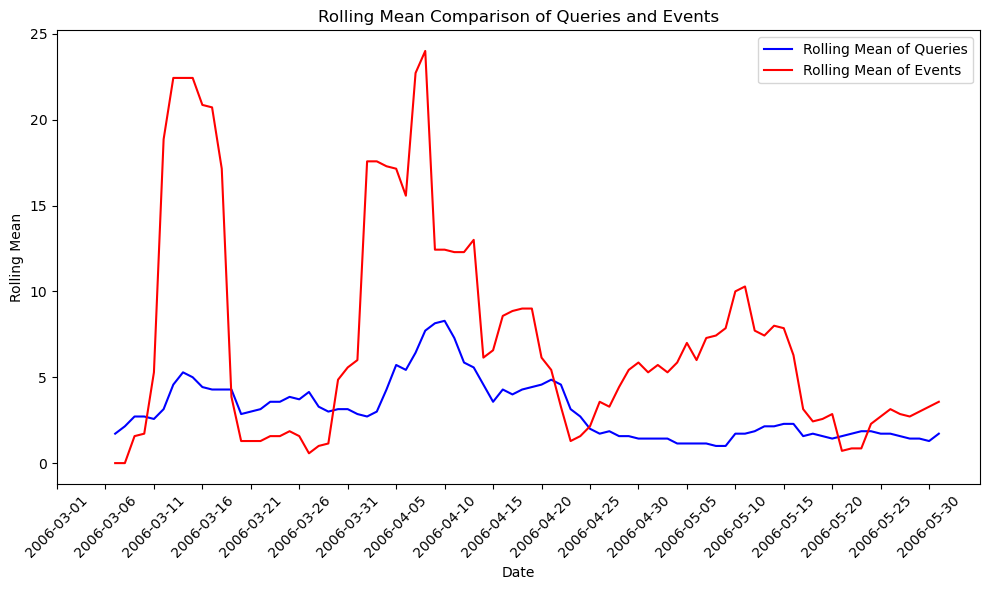

In [117]:
queries_by_day_df['rolling_mean'] = queries_by_day_df['NUMBER_OF_QUERIES'].rolling(window=7).mean()
events_by_day_df['rolling_mean'] = events_by_day_df['EVENT_COUNT'].rolling(window=7).mean()

# Plot the rolling means
plt.figure(figsize=(10, 6))
plt.plot(queries_by_day_df['timestamp'], queries_by_day_df['rolling_mean'], label='Rolling Mean of Queries', color='blue')
plt.plot(events_by_day_df['timestamp'], events_by_day_df['rolling_mean'], label='Rolling Mean of Events', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean Comparison of Queries and Events')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Get every 5th tick label
tick_positions = plt.gca().get_xticks()  # Get all tick positions
tick_labels = plt.gca().get_xticklabels()  # Get all tick labels

# Show only every 5th tick
plt.xticks(tick_positions[::5], tick_labels[::5])  # Use slicing to pick every 5th position


# Display legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### Cross-Correlation

To identify a lagged relationship between the time series

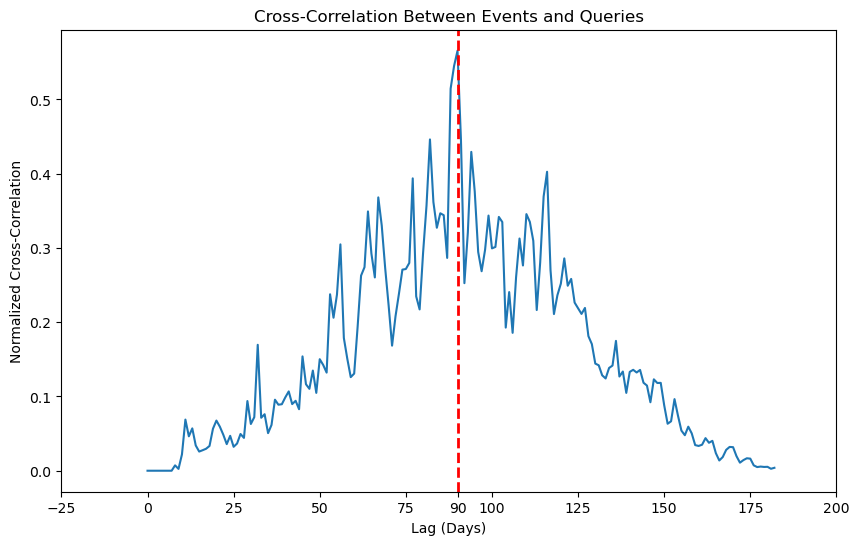

In [118]:
import numpy as np

# Normalize both time series (optional)
queries_by_day_df['normalized_query_count'] = queries_by_day_df['NUMBER_OF_QUERIES'] / queries_by_day_df['NUMBER_OF_QUERIES'].max()
events_by_day_df['normalized_event_count'] = events_by_day_df['EVENT_COUNT'] / events_by_day_df['EVENT_COUNT'].max()

# Calculate cross-correlation using numpy
cross_corr = np.correlate(events_by_day_df['normalized_event_count'], queries_by_day_df['normalized_query_count'], mode='full')

norm_q = np.linalg.norm(queries_by_day_df['normalized_query_count'])
norm_e = np.linalg.norm(events_by_day_df['normalized_event_count'])

normalized_cross_corr = cross_corr / (norm_q * norm_e)

optimal_lag = cross_corr.argmax()
# Plot the cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(normalized_cross_corr)

# Draw a vertical line at x = 3
plt.axvline(x=optimal_lag, color='red', linestyle='--', linewidth=2)

# Ensure the x-ticks include the value 3
plt.xticks(list(plt.gca().get_xticks()) + [optimal_lag])  # Add 3 if it's not already in the x-ticks

plt.title('Cross-Correlation Between Events and Queries')
plt.xlabel('Lag (Days)')
plt.ylabel('Normalized Cross-Correlation')
plt.show()